# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [21]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
p_apple = 0.6
q_orange = 1 - 0.6

print(f'''
    the probability that the fruit is an apple is: {p_apple}
    the probability that the fruit is an orange is: {q_orange}
''')



    the probability that the fruit is an apple is: 0.6
    the probability that the fruit is an orange is: 0.4



Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [12]:
my_bernoulli = bernoulli(p_apple)

muestra_20 = my_bernoulli.rvs(size=20)
muestra_20

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [22]:
print(f'''
probability of getting an apple from the first 5 fruits: {p_apple** 5}
probability that the first 5 fruits are apples and the 15 last fruits are oranges: {p_apple ** 5 + q_orange ** 15}
''')


probability of getting an apple from the first 5 fruits: 0.07775999999999998
probability that the first 5 fruits are apples and the 15 last fruits are oranges: 0.07776107374182398



## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [29]:
import math

In [30]:
N = 20
my_binomial = binom(N,p_apple)
#my_binomial.pmf(5)
print(f'''
probability that the first 5 fruits are apples and the 15 last fruits are oranges, in a 20 random sample: 
{(math.factorial(N) / (math.factorial(5)* math.factorial(N-5))) * p_apple**5 * q_orange**(N-5)}
''')



probability that the first 5 fruits are apples and the 15 last fruits are oranges, in a 20 random sample: 
0.0012944935222876579



In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [28]:
print(f'''
probability that less than 5 fruits picked are apples: {my_binomial.cdf(5)}
''')


probability that less than 5 fruits picked are apples: 0.0016115246434562898



**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [32]:
N_apples = np.arange(1,N+1)
prob = my_binomial.pmf(N_apples)
prob

array([3.29853488e-07, 4.70041221e-06, 4.23037099e-05, 2.69686150e-04,
       1.29449352e-03, 4.85435071e-03, 1.45630521e-02, 3.54974396e-02,
       7.09948791e-02, 1.17141551e-01, 1.59738478e-01, 1.79705788e-01,
       1.65882266e-01, 1.24411699e-01, 7.46470195e-02, 3.49907904e-02,
       1.23496907e-02, 3.08742268e-03, 4.87487792e-04, 3.65615844e-05])

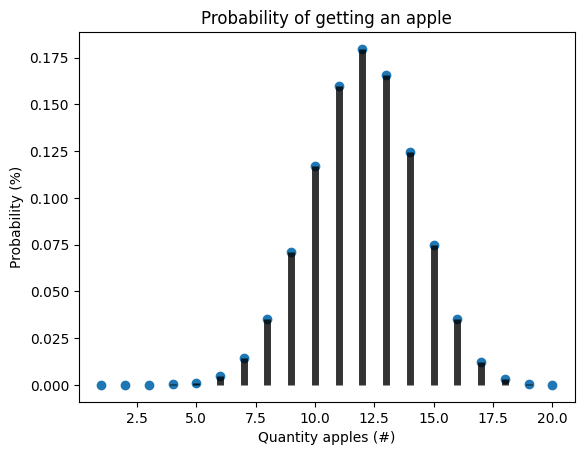

In [37]:
plt.plot(N_apples, my_binomial.pmf(N_apples), 'o')
plt.vlines(N_apples, 0, prob, colors='black', lw=5, alpha=0.8)
plt.title("Probability of getting an apple")
plt.xlabel("Quantity apples (#)")
plt.ylabel("Probability (%)");

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [40]:
avg_goals = 2.3

my_poisson = poisson(mu = avg_goals)
goal = 5 
chance_5_goals = (math.exp(-avg_goals) * (avg_goals**goal)) / math.factorial(goal)
print(f'The probability of scoring 5 goals in a UEFA match is: {chance_5_goals}')

The probability of scoring 5 goals in a UEFA match is: 0.0537750255819468


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [41]:
num_goals = np.arange(0,11)
num_goals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [42]:
scored_goals = my_poisson.pmf(num_goals)
scored_goals

array([1.00258844e-01, 2.30595341e-01, 2.65184642e-01, 2.03308225e-01,
       1.16902230e-01, 5.37750256e-02, 2.06137598e-02, 6.77309251e-03,
       1.94726410e-03, 4.97634158e-04, 1.14455856e-04])

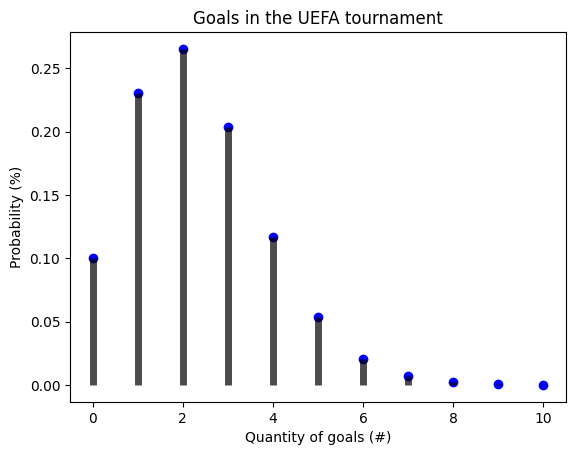

In [44]:
plt.plot(num_goals, my_poisson.pmf(num_goals), 'bo')
plt.vlines(num_goals, 0, scored_goals, colors='black', lw=5, alpha=0.7)
plt.title("Goals in the UEFA tournament")
plt.xlabel("Quantity of goals (#)")
plt.ylabel("Probability (%)");